In [1]:
'''
Market Basket Analysis: Apriori Algorithm 
Dataset: Order3.csv 
The dataset has 20507 rows and 5 columns of the purchase orders of people from the bakery. 
These orders can be analysed, and association rules can be generated using Market Basket Analysis by algorithms 
like Apriori Algorithm. 
Follow following steps: 
a. Data Pre-processing 
b. Generate the list of transactions from the dataset 
c. Train Apriori algorithm on the dataset 
d. Visualize the list of rules
'''

'\nMarket Basket Analysis: Apriori Algorithm \nDataset: Order3.csv \nThe dataset has 20507 rows and 5 columns of the purchase orders of people from the bakery. \nThese orders can be analysed, and association rules can be generated using Market Basket Analysis by algorithms \nlike Apriori Algorithm. \nFollow following steps: \na. Data Pre-processing \nb. Generate the list of transactions from the dataset \nc. Train Apriori algorithm on the dataset \nd. Visualize the list of rules\n'

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [17]:
data = pd.read_csv(r'LP-1_Dataset\Apriori\Order3.csv')

data.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend


In [18]:
data.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [19]:
data.columns

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')

In [20]:
transactions = data.groupby('TransactionNo')['Items'].apply(list).values.tolist()

In [21]:
print(transactions[:5])

[['Bread'], ['Scandinavian', 'Scandinavian'], ['Hot chocolate', 'Jam', 'Cookies'], ['Muffin'], ['Coffee', 'Pastry', 'Bread']]


In [22]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

In [23]:
df = pd.DataFrame(te_array, columns=te.columns_)

In [24]:
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.2)

In [25]:
print(frequent_itemsets)
print(rules)

     support                 itemsets
0   0.036344              (Alfajores)
1   0.016059               (Baguette)
2   0.327205                  (Bread)
3   0.040042                (Brownie)
4   0.103856                   (Cake)
..       ...                      ...
56  0.023666          (Toast, Coffee)
57  0.014369          (Tea, Sandwich)
58  0.010037    (Coffee, Bread, Cake)
59  0.011199  (Coffee, Bread, Pastry)
60  0.010037      (Coffee, Tea, Cake)

[61 rows x 2 columns]
         antecedents consequents  antecedent support  consequent support  \
0        (Alfajores)     (Bread)            0.036344            0.327205   
1        (Alfajores)    (Coffee)            0.036344            0.478394   
2          (Brownie)     (Bread)            0.040042            0.327205   
3             (Cake)     (Bread)            0.103856            0.327205   
4            (Bread)    (Coffee)            0.327205            0.478394   
5          (Cookies)     (Bread)            0.054411            0

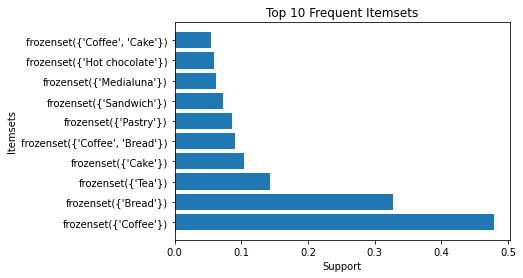

In [26]:
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
plt.barh(frequent_itemsets['itemsets'].head(10).astype(str), frequent_itemsets['support'].head(10))
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()

([<matplotlib.axis.YTick at 0x21fd3a81370>,
 [Text(0, 0, 'Toast -> Coffee'),
  Text(0, 1, 'Spanish Brunch -> Coffee'),
  Text(0, 2, 'Medialuna -> Coffee'),
  Text(0, 3, 'Pastry -> Coffee'),
  Text(0, 4, 'Alfajores -> Coffee'),
  Text(0, 5, 'Juice -> Coffee'),
  Text(0, 6, 'Sandwich -> Coffee'),
  Text(0, 7, 'Cake -> Coffee'),
  Text(0, 8, 'Scone -> Coffee'),
  Text(0, 9, 'Cookies -> Coffee')])

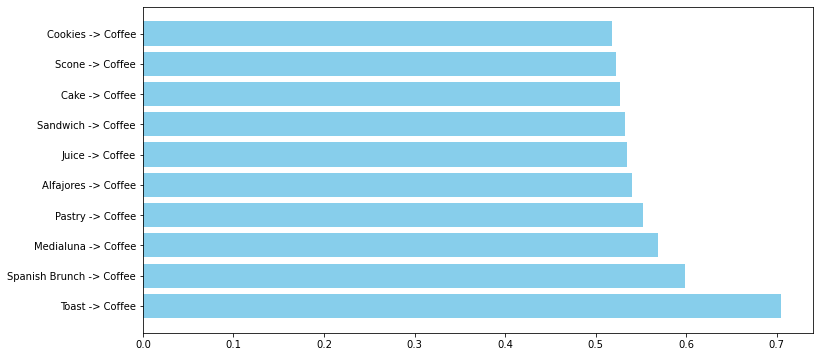

In [30]:
top_confidence_rules = rules.sort_values(by='confidence', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_confidence_rules)), top_confidence_rules['confidence'], color='skyblue')
plt.yticks(range(len(top_confidence_rules)), [f"{', '.join(list(a))} -> {', '.join(list(c))}"
                                             for a, c in zip(top_confidence_rules['antecedents'],
                                                            top_confidence_rules['consequents'])])

In [34]:
# Filter rules with high lift and confidence
strong_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.5)]
print(strong_rules)

         antecedents consequents  antecedent support  consequent support  \
1        (Alfajores)    (Coffee)            0.036344            0.478394   
11            (Cake)    (Coffee)            0.103856            0.478394   
13         (Cookies)    (Coffee)            0.054411            0.478394   
14   (Hot chocolate)    (Coffee)            0.058320            0.478394   
15           (Juice)    (Coffee)            0.038563            0.478394   
16       (Medialuna)    (Coffee)            0.061807            0.478394   
18          (Pastry)    (Coffee)            0.086107            0.478394   
19        (Sandwich)    (Coffee)            0.071844            0.478394   
20           (Scone)    (Coffee)            0.034548            0.478394   
22  (Spanish Brunch)    (Coffee)            0.018172            0.478394   
24           (Toast)    (Coffee)            0.033597            0.478394   

     support  confidence      lift  leverage  conviction  zhangs_metric  
1   0.019651 